<a href="https://colab.research.google.com/github/frankl1/Introduction-to-Tensorflow-for-Deep-Learning/blob/master/classify_fashion_mnist_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import logging

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train, test = dataset["train"], dataset["test"]

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [25]:
num_train_examples, num_test_examples = metadata.splits["train"].num_examples, metadata.splits["test"].num_examples
print(f"Number of train examples {num_train_examples}")
print(f"Number of test examples {num_test_examples}")

Number of train examples 60000
Number of test examples 10000


In [0]:
def normalize(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, label

In [0]:
# Normalizing the dataset
train = train.map(normalize)
test = test.map(normalize)

# Cahing the dataset to speed up training
train = train.cache()
test = test.cache()

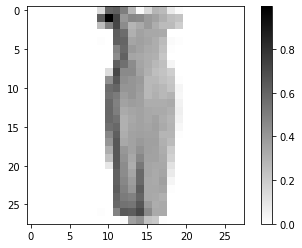

In [28]:
for image, label in train.take(1):
  break

image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

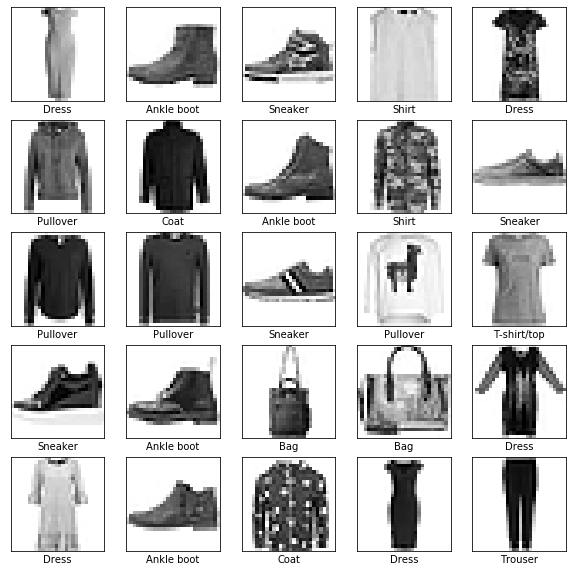

In [29]:
plt.figure(figsize=(10, 10))
i = 0
for image, label in train.take(25):
  image = image.numpy().reshape((28, 28))
  
  plt.subplot(5, 5, i+1)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[label])

  i += 1

In [0]:
def build_model():
  return tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

In [0]:
model = build_model()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
NUM_EPOCH = 5
train = train.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

In [33]:
history = model.fit(train, epochs=NUM_EPOCH, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1333 - accuracy: 0.9506
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1167 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0973 - accuracy: 0.9631
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0822 - accuracy: 0.9702
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0694 - accuracy: 0.9741
Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3998 - accuracy: 0.8561
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2558 - accuracy: 0.9070
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2133 - accuracy: 0.9225
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1804 - accuracy: 0.9337
Epoch 5/5
1875/1875 [==================

In [0]:
def plot_history(history):
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, NUM_EPOCH+1), history['accuracy'])
  plt.ylabel("Accuracy")
  plt.xlabel('Epochs')

  plt.subplot(1, 2, 2)
  plt.plot(range(1, NUM_EPOCH+1), history['loss'])
  plt.ylabel("Loss")
  plt.xlabel('Epochs')

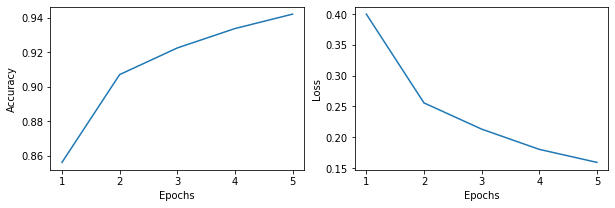

In [35]:
plot_history(history.history)

In [36]:
test_loss, test_accuracy = model.evaluate(test, steps=math.ceil(num_test_examples / BATCH_SIZE))
print("Accuracy on test:", test_accuracy)

313/313 [==============================] - 4s 11ms/step - loss: 0.2451 - accuracy: 0.9154
Accuracy on test: 0.9154


In [0]:
for test_images, test_labels in test.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
def plot_image(pos, predictions, true_labels, images):
  img = images[pos].reshape((28, 28))
  label = np.argmax(predictions[pos])
  true_label = true_labels[pos]
  confidence = round(np.max(predictions[pos]) * 100, 2)
  color = "green" if label == true_labels[pos] else "red"

  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"{class_names[label]} {confidence}% ({class_names[true_label]})", color=color)

def plot_predictions(pos, predictions, true_labels):
  plt.xticks([])
  plt.yticks([])
  this_plot = plt.bar(range(10), predictions[pos])
  this_plot[np.argmax(predictions[pos])].set_color("red")
  this_plot[true_labels[pos]].set_color("green")

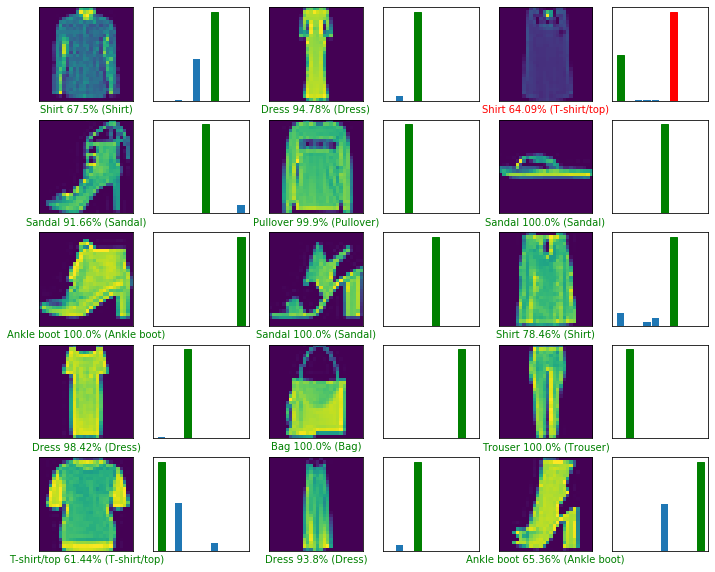

In [39]:
nrows = 5
ncols = 3
count = nrows * ncols
plt.figure(figsize=(2*2*ncols, 2*nrows))
for i in range(count):
  plt.subplot(nrows, 2*ncols, 2*i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(nrows, 2*ncols, 2*i + 2)
  plot_predictions(i, predictions, test_labels)
